


Analytical method

Uniform posterior
> Mean: 2.6 
> Variance: 0.52 
> Gamma distribution median has no simple closed form

Jeffrey posterior
> Mean: 2.5 
> Variance: 0.5 
> Gamma distribution median has no simple closed form



Numerical method

Uniform posterior
> Mean: 2.598987 
> Median: 2.533646 
> Variance: 0.51884

Jeffrey posterior
> Mean: 2.49937 
> Median: 2.433659 
> Variance: 0.4991574



Uniform posterior
95% credibility interval from 1.38439 to 4.192317

Jeffrey posterior
95% credibility interval from 1.311972 to 4.064647



Uniform posterior: gaussian approximation
95% credibility interval from 0.9593891 to 3.840611

Jeffrey posterior: gaussian approximation
95% credibility interval from 0.8969785 to 3.723021

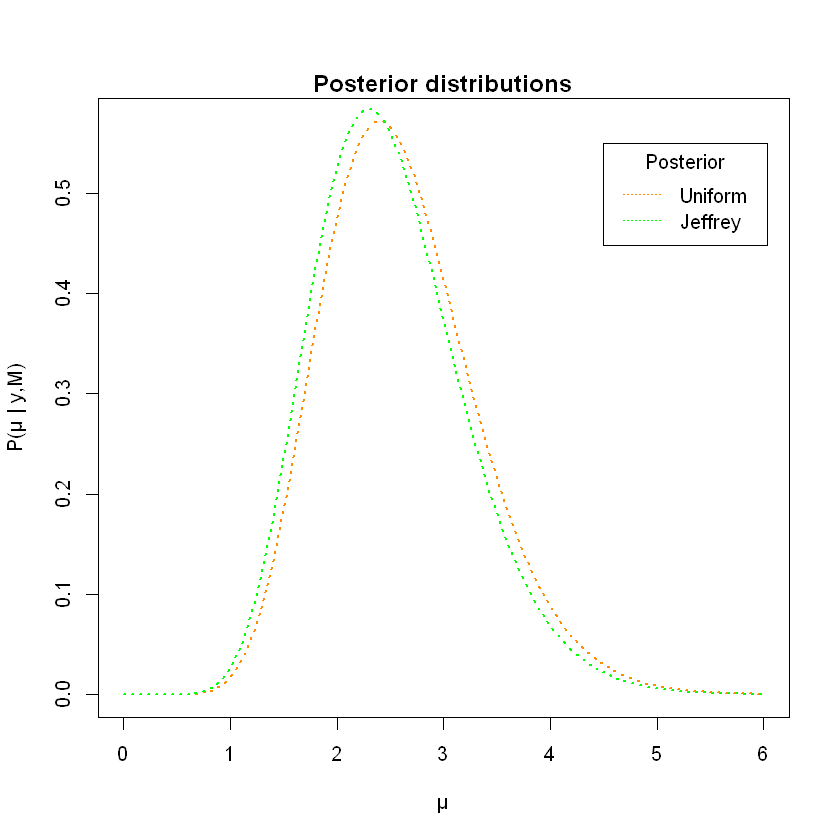

In [71]:
#Exercise 1

n.sample<-200
x.min<-0
x.max<-6
h<-(x.max-x.min)/n.sample
μ<-seq(from=x.min, by=h, length.out=n.sample+1)

data<-c(4,1,3,1,3)
dataSum<-sum(data)

uniform.alpha<-dataSum+1
jeffrey.alpha<-dataSum+0.5
lambda<-5

uniform.posterior<-dgamma(μ, shape=uniform.alpha, rate=lambda)
jeffrey.posterior<-dgamma(μ, shape=jeffrey.alpha, rate=lambda)



Mean<-function(posterior){                                          #Questions a and b
    E<-h*sum(μ*posterior)
    return(E)
}
Var<-function(posterior){
    E<-h*sum(μ*posterior)
    E2<-h*sum((μ^2)*posterior)
    return(E2-E^2)
}

plot(μ, uniform.posterior, type="l", xlim=c(x.min,x.max), col="darkorange", lwd=2, lty=3, xlab="μ", ylab=paste("P(μ | y,M)"),)
lines(μ, jeffrey.posterior, col="green", lwd=2, lty=3)
title(main="Posterior distributions", line=0.3, cex.main=1.2)
legend(4.5, 0.55, legend=c("Uniform", "Jeffrey"), col=c("darkorange", "green"), lty=3, title="Posterior")

cat("\n\n\nAnalytical method\n\nUniform posterior\n> Mean:", uniform.alpha/lambda, "\n> Variance:", uniform.alpha/(lambda)^2,
   "\n> Gamma distribution median has no simple closed form")
cat("\n\nJeffrey posterior\n> Mean:", jeffrey.alpha/lambda, "\n> Variance:", jeffrey.alpha/(lambda)^2, 
    "\n> Gamma distribution median has no simple closed form")

cat("\n\n\n\nNumerical method\n\nUniform posterior\n> Mean:", Mean(uniform.posterior), 
    "\n> Median:", qgamma(0.5, shape=uniform.alpha, rate=lambda), "\n> Variance:", Var(uniform.posterior))
cat("\n\nJeffrey posterior\n> Mean:", Mean(jeffrey.posterior), "\n> Median:", qgamma(0.5, shape=jeffrey.alpha, rate=lambda), 
    "\n> Variance:", Var(jeffrey.posterior))

           

cat("\n\n\n\nUniform posterior")                                                                    #Question c
cat("\n95% credibility interval from", qgamma(0.025, shape=uniform.alpha, rate=lambda), 
    "to", qgamma(0.975, shape=uniform.alpha, rate=lambda))

cat("\n\nJeffrey posterior")
cat("\n95% credibility interval from", qgamma(0.025, shape=jeffrey.alpha, rate=lambda), 
    "to", qgamma(0.975, shape=jeffrey.alpha, rate=lambda))



mode<-function(posterior){
    μ[which.max(posterior)]
}
cat("\n\n\n\nUniform posterior: gaussian approximation")                                                            
cat("\n95% credibility interval from", mode(uniform.posterior)-2*sqrt(Var(uniform.posterior)), 
    "to", mode(uniform.posterior)+2*sqrt(Var(uniform.posterior)))

cat("\n\nJeffrey posterior: gaussian approximation")
cat("\n95% credibility interval from", mode(jeffrey.posterior)-2*sqrt(Var(jeffrey.posterior)), 
    "to", mode(jeffrey.posterior)+2*sqrt(Var(jeffrey.posterior)))


Enter alpha unkonwn true value: 3
Enter beta unkonwn true value (ß > 0): 2
Enter data set dimension: 100


Data set mean:  -54.69623
Alpha most probable value:  2.82
Beta most probable value:  1.77

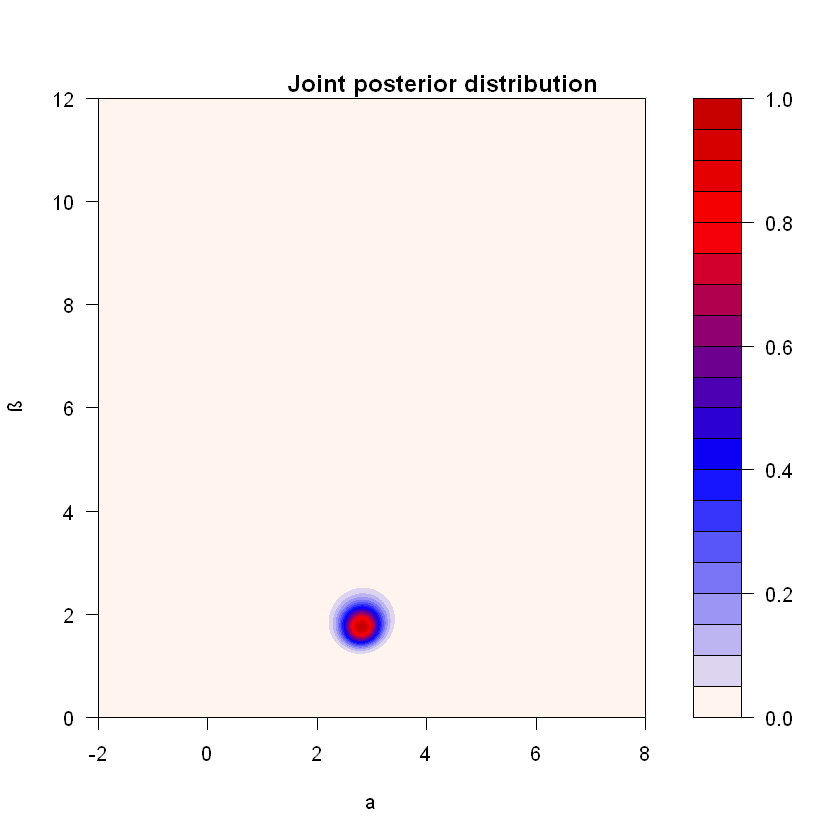

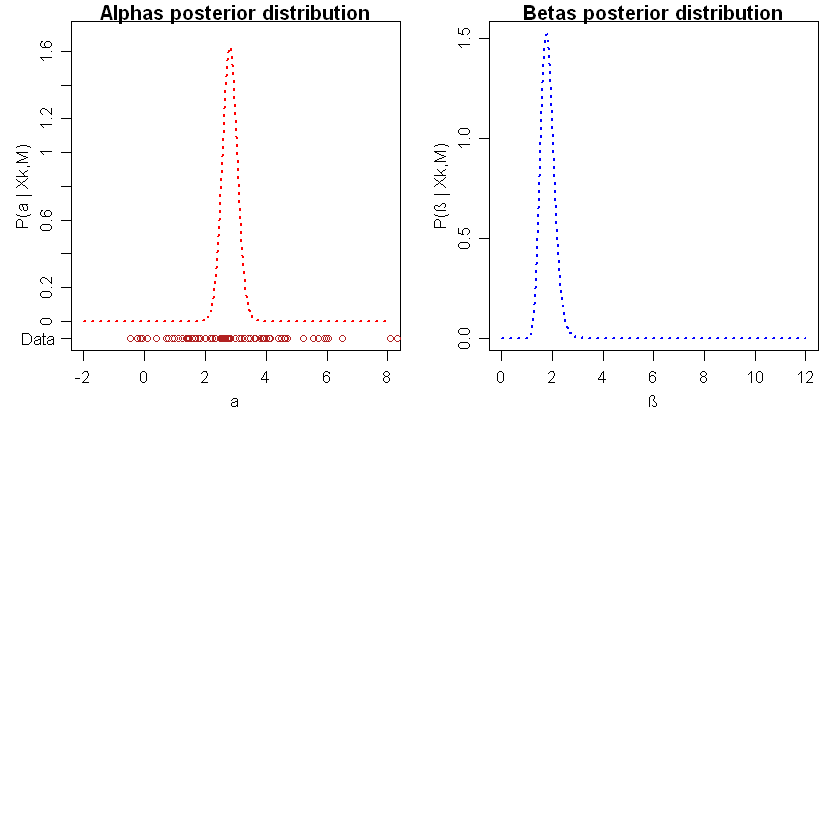

In [75]:
# Exercise 2

library(tidyverse)

alpha<-readline("Enter alpha unkonwn true value: ") %>% as.numeric()              
beta<-readline("Enter beta unkonwn true value (β > 0): ") %>% as.numeric()
N<-readline("Enter data set dimension: ") %>% as.numeric()

set.seed(347689)                #Create a dateset
theta_k<-runif(N,-pi/2,pi/2)
x_k<-beta*tan(theta_k)+alpha


x_min<-alpha-5
x_max<-alpha+5
y_max<-beta+10
delta.x<-(x_max-x_min)/(1000)
delta.y<-y_max/(y_max*100)
alphas<-seq(from=x_min, to=x_max, by=delta.x)
betas<-seq(from=0, to=y_max, by=delta.y)



log.joint.posterior <- function(a,b){                               #Joint posterior distribution
  sum( log( b/(b^2+(x_k-a)^2) )) 
}

log.joint.star<-outer(alphas, betas, Vectorize(log.joint.posterior))
log.joint.star<-log.joint.star-max(log.joint.star)

filled.contour(alphas, betas, exp(log.joint.star), lwd=2, xlab="α", ylab="β",
               col=rev(colorRampPalette(c("darkred","red","blue", "seashell"))(24)))
title(main="Joint posterior distribution", line=0.3, cex.main=1.2)



alpha.post <- apply(exp(log.joint.star), 1, sum)        #Normalized marginalized posteriors
alpha.post <- alpha.post/(delta.x*sum(alpha.post))
beta.post <- apply(exp(log.joint.star), 2, sum)
beta.post <- beta.post/(delta.y*sum(beta.post))

par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
plot(alphas, alpha.post, type="l", col="red", lwd=2, lty=3, xlab="α", ylab="P(α | Xk,M)", ylim=c(-0.1, 1.05*max(alpha.post)),
    main="Alphas posterior distribution", yaxt="n")
points(x = x_k, y = rep(-0.1, length(x_k)), pch = 1, col = "firebrick", cex=1)
axis(2, at=-0.1, labels="Data", las=2)
axis(2, at=seq(0, max(alpha.post), 0.2), labels=seq(0, max(alpha.post), 0.2))



plot(betas, beta.post, type="l", col="blue", lwd=2, lty=3, xlab="β", ylab="P(β | Xk,M)",  main="Betas posterior distribution")




max.alpha<-alphas[which.max(alpha.post)]
max.beta<-betas[which.max(beta.post)]
cat("\n\nData set mean: ", mean(x_k))
cat("\nAlpha most probable value: ", max.alpha)
cat("\nBeta most probable value: ",  max.beta)

Enter A signal amplitude unkonwn true value (A>0): 2
Enter B background amplitude unkonwn true value (B>0): 1
A/B = 2

w =  0.1 
<A> =  1.868852 +/- 0.3936758 
<B> =  0.8838262 +/- 0.09218931 
rho =  -0.3830947 


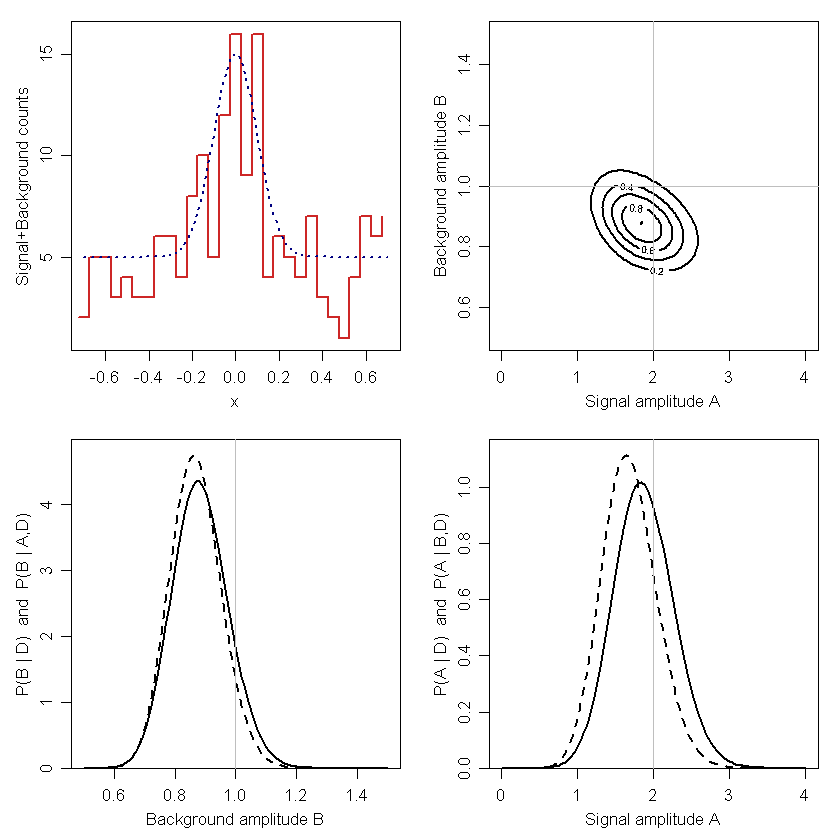



w =  0.25 
<A> =  2.787715 +/- 0.430077 
<B> =  0.9311782 +/- 0.0939479 
rho =  -0.3369099 


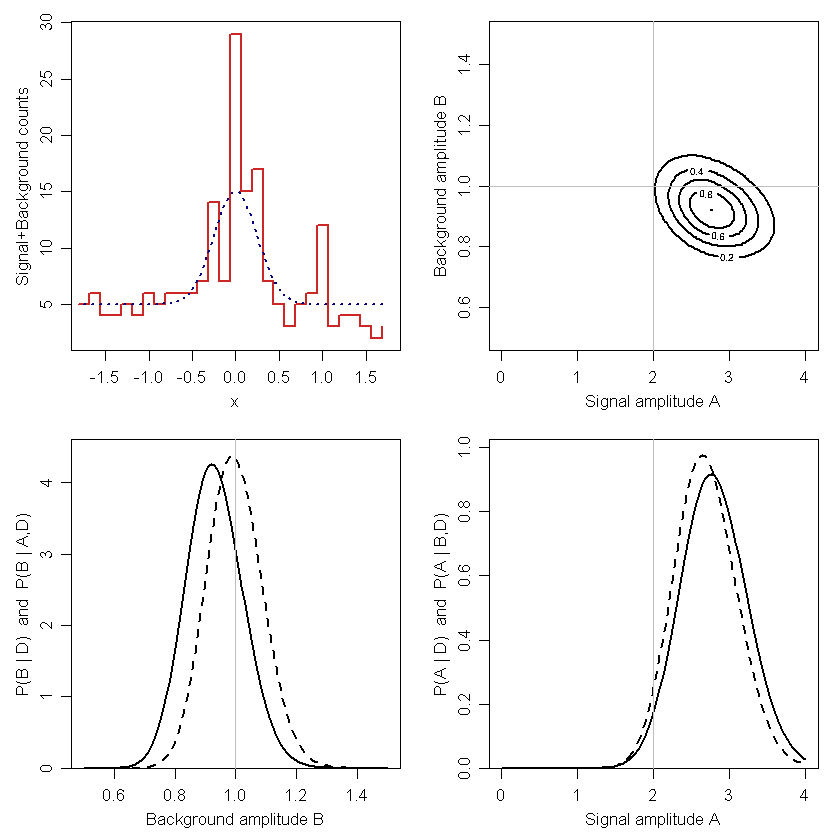



w =  1 
<A> =  1.809536 +/- 0.4109211 
<B> =  1.14217 +/- 0.103349 
rho =  -0.3911222 


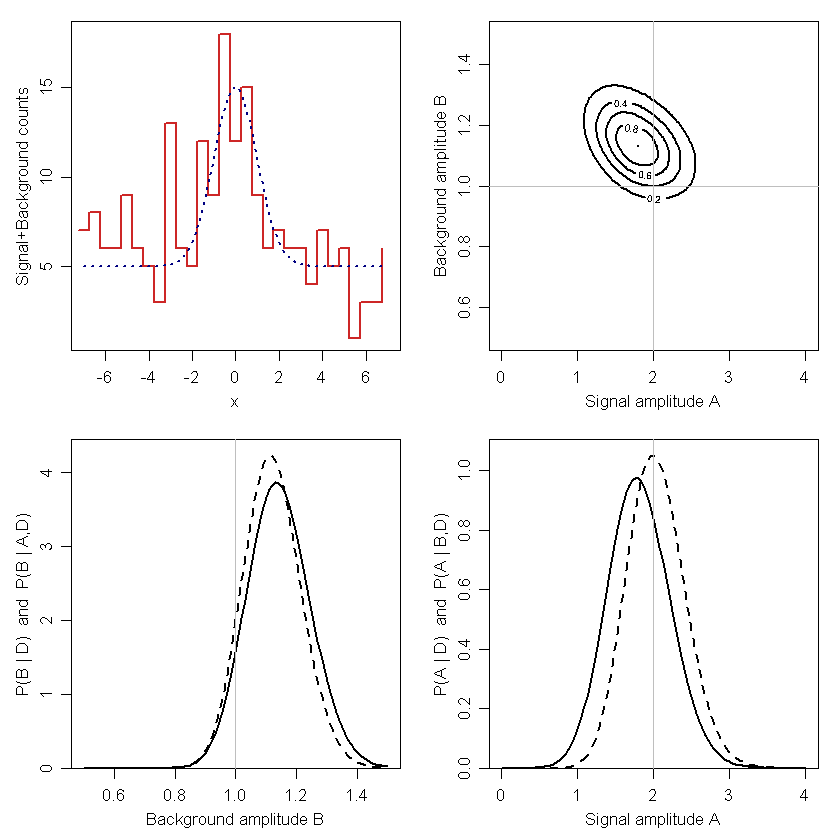



w =  2 
<A> =  2.810297 +/- 0.4264672 
<B> =  0.8168721 +/- 0.08904408 
rho =  -0.3417776 


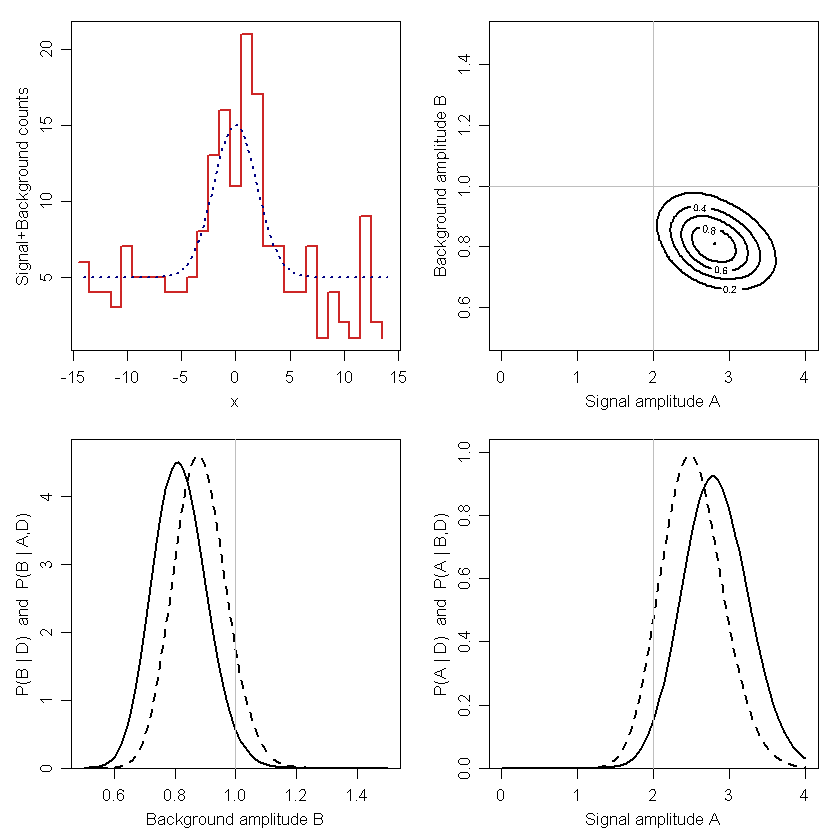



w =  3 
<A> =  2.004161 +/- 0.4155995 
<B> =  1.046633 +/- 0.09993581 
rho =  -0.3860945 


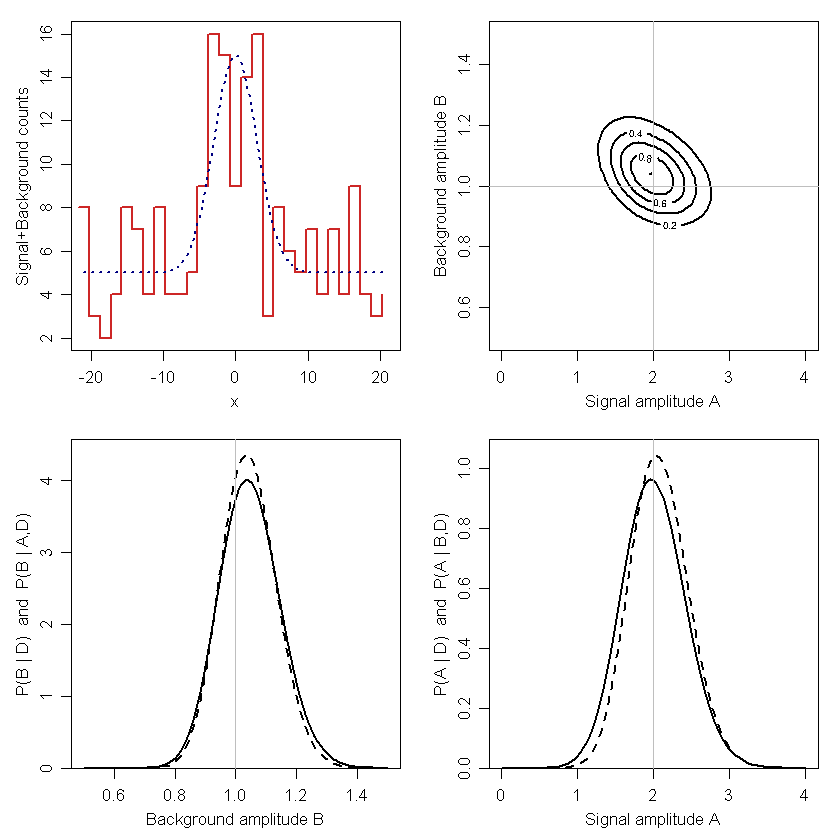

In [62]:
#Exercise 3

library(tidyverse)

x0<-0                                                                                      #Signal peak
delta.t<-5                                                                                 #Exposure time
w<-list(0.1, 0.25, 1, 2, 3)                                                                #Signal width 
A.true<-readline("Enter A signal amplitude unkonwn true value (A>0): ") %>% as.numeric()         #Signal amplitude
B.true<-readline("Enter B background amplitude unkonwn true value (B>0): ") %>% as.numeric()     #Background amplitude
cat("A/B = ", A.true/B.true, sep="")

delta.a<-4/100
delta.b<-1/100
A<-seq(from=A.true-2, to=A.true+2, by=delta.a)
B<-seq(from=B.true-0.5, to=B.true+0.5, by=delta.b)

signal<-function(x, a, b, w){
    delta.t*(a*exp(-(x-x0)^2/(2*w^2))+b)
}
x.mean<-function(delta, x, F_x){
    delta*sum(x*F_x)
}
x.sd<-function(delta, x, F_x){
    sqrt( delta*sum((x-x.mean(delta, x, F_x))^2*F_x) )
}

widthAna<-function(w){
    #set.seed(205)                              #Expected & Observed Signal (put the same seed to have equal observed.signal 
    xdat<-seq(from=-7*w, to=7*w, by=0.5*w)                          #                  -> Equal joint probability distributions)
    expected.signal<-signal(xdat, A.true, B.true, w)                #We expect the same expected.signal for every w (x0 = 0 and
    observed.signal<-rpois(length(expected.signal), expected.signal)     #                                            x_k = n*w)
    
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot, A.true, B.true, w)
    xdat.off <- xdat-0.25*w
    
    par(mfrow=c(2,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
    plot(xdat.off, observed.signal, type="s", col="firebrick3", xlab="x", ylab="Signal+Background counts", lwd=2, 
    xlim=range(xplot), ylim=range(c(splot, observed.signal)))
    lines(xplot, splot, col="navy", type="l", lwd=2, lty=3)
    
    
    
    log.posterior<-function(a, b, w){                                              #Joint posterior distribution 
        if(a<0 || b<0) {return(-Inf)}                                   
        sum(dpois(observed.signal, lambda=signal(xdat, a, b, w), log=TRUE))
    }
    log.joint.star<-outer(A, B, Vectorize(log.posterior), w) 
    log.joint.star<-log.joint.star-max(log.joint.star)
    
    contour(A, B, exp(log.joint.star), nlevels=5, labcex=0.5, lwd=2, xlab="Signal amplitude A", 
            ylab="Background amplitude B") 
    abline(v=A.true, h=B.true, col="grey")
    
    
    
    p_a_D <- apply(exp(log.joint.star), 1, sum)        #Normalized marginalized posteriors & normalized conditional posteriors
    p_a_D <- p_a_D/(delta.a*sum(p_a_D))
    p_b_D <- apply(exp(log.joint.star), 2, sum)
    p_b_D <- p_b_D/(delta.b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.posterior , "a")(A, B.true , w))
    p_a_bD <- p_a_bD/(delta.a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.posterior , "b")(A.true , B, w))
    p_b_aD <- p_b_aD/(delta.b*sum(p_b_aD))
   

    plot(B, p_b_D, xlab="Background amplitude B", yaxs="i", ylim=1.05*c(0,max(p_b_D, p_b_aD)), 
         ylab="P(B | D)  and  P(B | A,D)", type="l", lwd=2)
    lines(B, p_b_aD, lwd=2, lty=2)
    abline(v=B.true , col="grey")
    plot(A, p_a_D, xlab="Signal amplitude A", yaxs="i", ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A | D)  and  P(A | B,D)",
         type="l", lwd=2)
    lines(A, p_a_bD, lwd=2, lty=2)
    abline(v=A.true , col="grey")
    
    
    
    mean.a<-x.mean(delta.a, A, p_a_D)           #Mean, standard deviation, covariance & correlation
    mean.b<-x.mean(delta.b, B, p_b_D)
    sd.a<-x.sd(delta.a, A, p_a_D) 
    sd.b<-x.sd(delta.b, B, p_b_D)
    cov.ab<-0
    for(j in 1:length(A)) {
        for(k in 1:length(B)) {
            cov.ab<-cov.ab+(A[j]-mean.a)*(B[k]-mean.b)*exp(log.joint.star[j,k])
        }
    }
    cov.ab<-cov.ab/sum(exp(log.joint.star))
    rho.ab<-cov.ab/(sd.a*sd.b)
    
    cat("\n\nw = ", w, "\n")
    cat("<A> = ", mean.a, "+/-", sd.a, "\n")
    cat("<B> = ", mean.b, "+/-", sd.b, "\n")
    cat("rho = ", rho.ab, "\n")
}

walk(w, widthAna)